<a href="https://colab.research.google.com/github/showpiecep/ML_labs/blob/main/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('iris.data',header=None)

In [2]:
X = data.iloc[:,:4].to_numpy()
labels = data.iloc[:,4].to_numpy()

In [3]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Y = le.fit_transform(labels)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)

In [5]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print((y_test != y_pred).sum()) #количество наблюдений, который были неправильно определены

3


In [6]:
gnb.score(X_test, y_test)

0.96

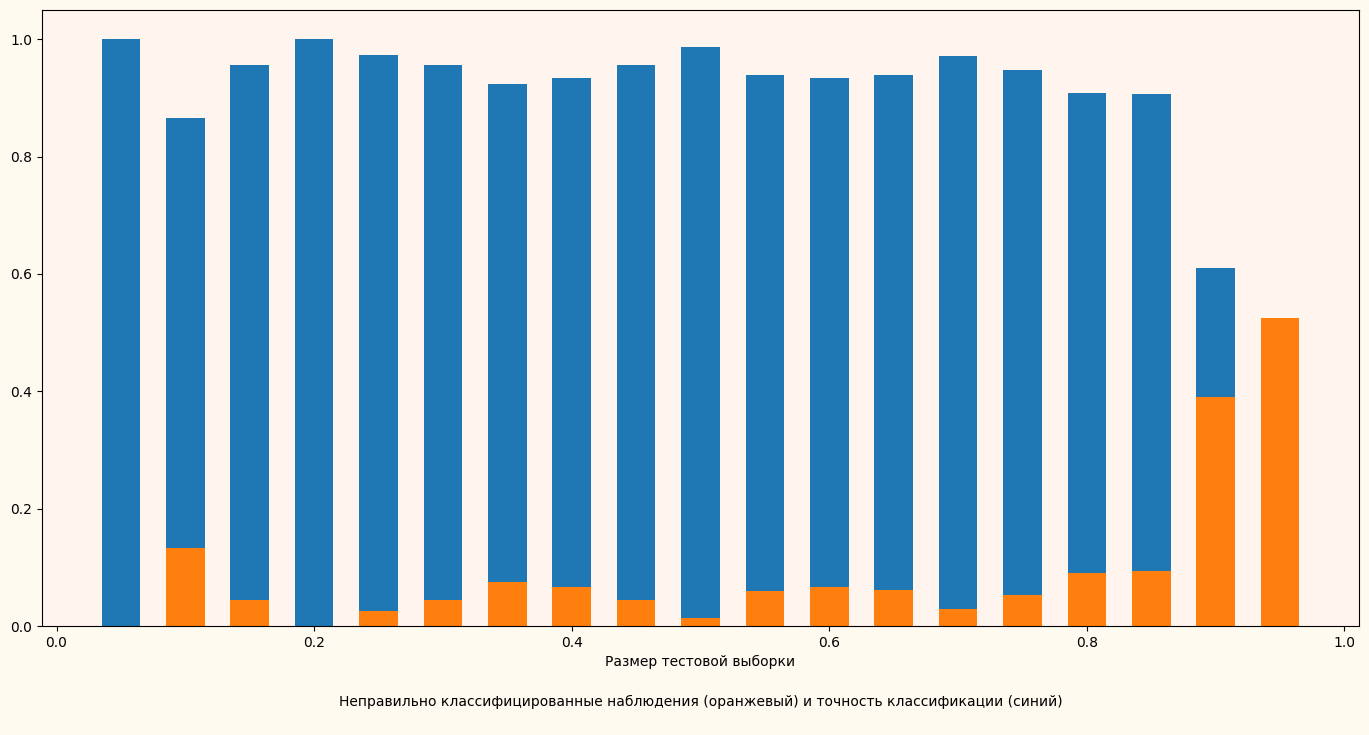

In [7]:
import matplotlib.pyplot as plt

size = 0
list_test_size = []
percentage_misclassified_observations = []
classification_accuracy = []

while size <= 0.95:
    size += 0.05

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=size)
    gnb = GaussianNB()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)

    list_test_size.append(size)
    percentage_misclassified_observations.append(np.count_nonzero(y_test != y_pred) / len(y_pred))
    classification_accuracy.append(gnb.fit(X_train, y_train).score(X_test, y_test))

fig, ax = plt.subplots()

ax.bar(list_test_size, classification_accuracy, width=0.03)
ax.bar(list_test_size, percentage_misclassified_observations, width=0.03)

ax.set_facecolor('seashell')
fig.set_figwidth(17)
fig.set_figheight(8)
fig.set_facecolor('floralwhite')

plt.xlabel('Размер тестовой выборки')

plt.figtext(0.3, -0.01, 'Неправильно классифицированные наблюдения (оранжевый) и точность классификации (синий)\n')

plt.show()

Чем меньше тестовая выборка, тем может быть наибольшее значение ошибок, выдаваемых классификатором, т.к. если ошибок одинаковое количество, но при этом размер выборок будет разный, то и соответственно loss'ы будут разные



In [10]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(force_alpha=True)
y_pred = clf.fit(X_train, y_train).predict(X_test)
print(f'Количество наблюдений, который были неправильно определены {(y_test != y_pred).sum()}')
print(f'Score {clf.score(X_test, y_test)}')

Количество наблюдений, который были неправильно определены 66
Score 0.5384615384615384


In [11]:
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB(force_alpha=True)
y_pred = cnb.fit(X_train, y_train).predict(X_test)
print(f'Количество наблюдений, который были неправильно определены {(y_test != y_pred).sum()}')
print(f'Score {cnb.score(X_test, y_test)}')

Количество наблюдений, который были неправильно определены 48
Score 0.6643356643356644


In [12]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB(force_alpha=True)
y_pred = bnb.fit(X_train, y_train).predict(X_test)
print(f'Количество наблюдений, который были неправильно определены {(y_test != y_pred).sum()}')
print(f'Score {bnb.score(X_test, y_test)}')

Количество наблюдений, который были неправильно определены 97
Score 0.32167832167832167


In [13]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print((y_test != y_pred).sum())

37


In [14]:
clf.score(X_test, y_test)

0.7412587412587412

In [15]:
clf.get_n_leaves()

3

In [16]:
clf.get_depth()

2

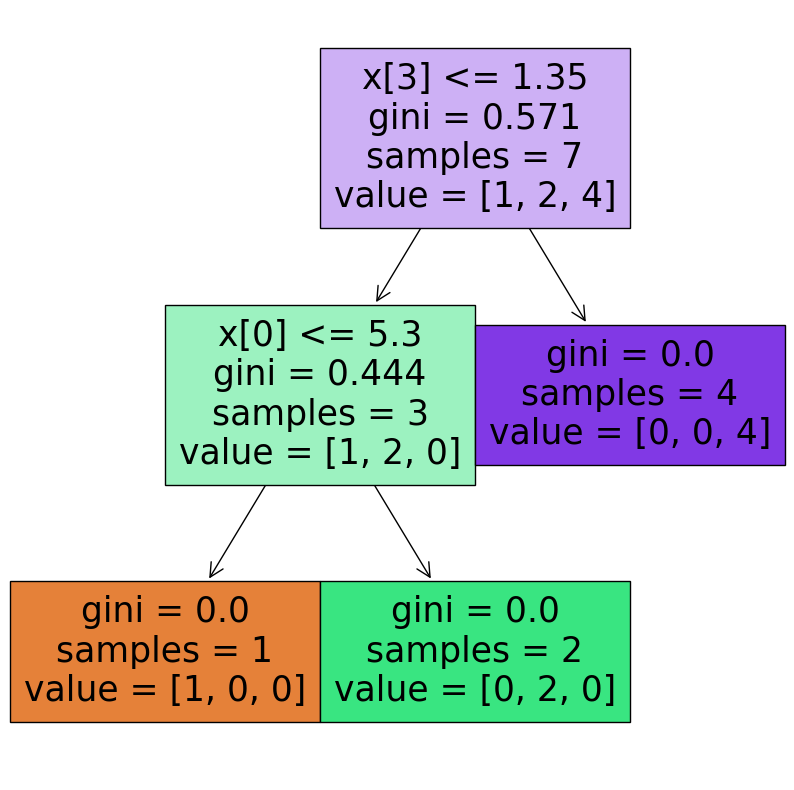

In [17]:
import matplotlib.pyplot as plt
plt.subplots(1,1,figsize = (10,10))
tree.plot_tree(clf, filled = True)
plt.show()

Показанные количества выборок взвешиваются с учетом всех возможных значений sample_weights.

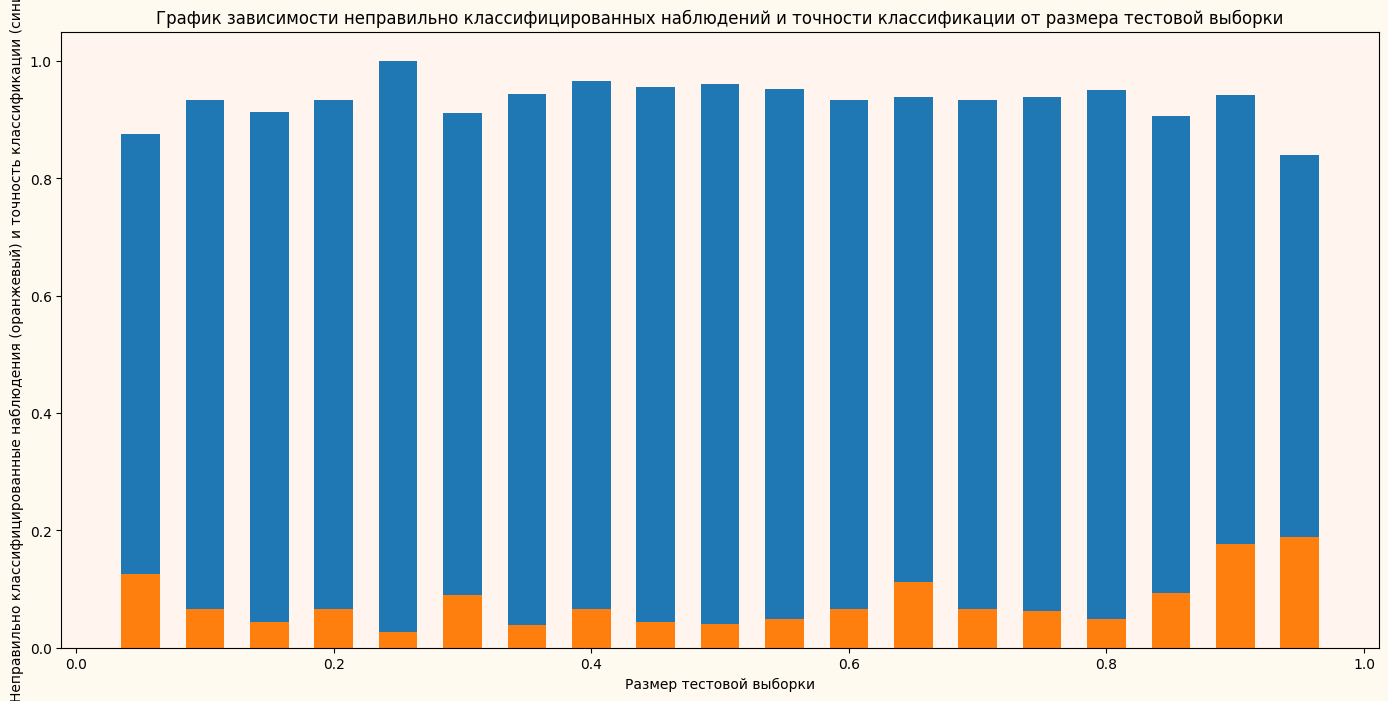

In [18]:
size = 0
list_test_size = []
percentage_misclassified_observations = []
classification_accuracy = []

while size <= 0.95:
    size += 0.05

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=size)
    gnb = tree.DecisionTreeClassifier()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)

    list_test_size.append(size)
    percentage_misclassified_observations.append(np.count_nonzero(y_test != y_pred) / len(y_pred))
    classification_accuracy.append(gnb.fit(X_train, y_train).score(X_test, y_test))

fig, ax = plt.subplots()

ax.bar(list_test_size, classification_accuracy, width=0.03)
ax.bar(list_test_size, percentage_misclassified_observations, width=0.03)

ax.set_facecolor('seashell')
fig.set_figwidth(17)
fig.set_figheight(8)
fig.set_facecolor('floralwhite')

plt.xlabel('Размер тестовой выборки')
plt.ylabel('Неправильно классифицированные наблюдения (оранжевый) и точность классификации (синий)')
plt.title(
    label='График зависимости неправильно классифицированных наблюдений и точности классификации от размера тестовой выборки',
    fontweight=12)

plt.show()

Чем меньше тестовая выборка, тем может быть наибольшее значение ошибок, выдаваемых классификатором, т.к. если ошибок одинаковое количество, но при этом размер выборок будет разный, то и соответственно loss'ы будут разные

In [19]:
from random import randint

criterion_parameters = ('gini', 'entropy', 'log_loss')
splitter_parameter = ('best', 'random')
for parameter in criterion_parameters:
    sp_par_random = splitter_parameter[randint(0, 1)]
    max_dp_random = randint(5, 40)
    min_samples_split_random = randint(5, 40)
    min_samples_leaf_random = randint(5, 40)

    gnb = tree.DecisionTreeClassifier(criterion=parameter, splitter=sp_par_random, max_depth=max_dp_random,
                                      min_samples_split=min_samples_split_random,
                                      min_samples_leaf=min_samples_leaf_random)
    y_pred = gnb.fit(X_train, y_train).predict(X_test)

    print(f'При criterion: {parameter}, splitter: {sp_par_random}, max_depth: {max_dp_random}, min_samples_split: {min_samples_split_random}, min_samples_leaf: {min_samples_leaf_random} \n точность классификации {gnb.fit(X_train, y_train).score(X_test, y_test) * 100}%, количество листьев: {gnb.get_n_leaves()}, глубина: {gnb.get_depth()}\n')

При criterion: gini, splitter: best, max_depth: 13, min_samples_split: 23, min_samples_leaf: 32 
 точность классификации 32.86713286713287%, количество листьев: 1, глубина: 0

При criterion: entropy, splitter: random, max_depth: 20, min_samples_split: 8, min_samples_leaf: 27 
 точность классификации 32.86713286713287%, количество листьев: 1, глубина: 0

При criterion: log_loss, splitter: best, max_depth: 11, min_samples_split: 14, min_samples_leaf: 7 
 точность классификации 32.86713286713287%, количество листьев: 1, глубина: 0

